## Project Overview
A consumer finance company lends loan of different kinds to its urban clients. It has the data of its current and past clients, including those who have defaulted, and it wants to minimize credit loss by identifying the potential defaulters with the use of the available data.



## Objective
Using Exploratory Data Analysis (EDA) to identify the variable(s) which can indicate whether a borrower is a "Risky Customer" or not.

## Macro-Steps Involved


1. Importing Required Libraries
2. Analyzing the Data
3. Data Cleaning
4. Univariate Analysis
5. Bivariate Analysis
6. Interpretation of the EDA

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Analyzing the Data

In [2]:
# A. Loading the loan data
loan = pd.read_csv("loan.csv")

In [3]:
# B. Understanding the data by looking at its top rows

loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# C. Brief information of the loan data


print("Shape of the data: ",loan.shape)
print("\n")
print(loan.info())

Shape of the data:  (39717, 111)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [5]:
# D. Checking number of missing cells in each column

loan.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Note:
There are many columns which are null, so we need to remove those columns

##  Data Cleaning

In [6]:
# A. Removing columns having no data at all

loan.dropna(axis=1, how="all", inplace = True)

# B. Percentage of missing values in each columns after removing columns with no values
round((loan.isnull().sum()*100/len(loan)).sort_values(ascending=False))

next_pymnt_d                  97.0
mths_since_last_record        93.0
mths_since_last_delinq        65.0
desc                          33.0
emp_title                      6.0
emp_length                     3.0
pub_rec_bankruptcies           2.0
last_pymnt_d                   0.0
chargeoff_within_12_mths       0.0
collections_12_mths_ex_med     0.0
revol_util                     0.0
tax_liens                      0.0
title                          0.0
last_credit_pull_d             0.0
home_ownership                 0.0
int_rate                       0.0
out_prncp_inv                  0.0
total_pymnt                    0.0
total_pymnt_inv                0.0
total_rec_prncp                0.0
total_rec_int                  0.0
total_rec_late_fee             0.0
recoveries                     0.0
collection_recovery_fee        0.0
term                           0.0
last_pymnt_amnt                0.0
initial_list_status            0.0
funded_amnt_inv                0.0
policy_code         

### Note:
As we can see that there are significant number of missing values in three columns, so they will not add any value to our analysis, hence we need to remove these columns

In [7]:
# C. Removing columns that have significant number of missing values

missing_values_columns = ["next_pymnt_d", "mths_since_last_record", "mths_since_last_delinq"]
loan.drop(missing_values_columns, axis=1, inplace=True)

In [8]:
# D. Checking the info of remaining dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Note:
1) Now, we have 54 columns but not all of them is required for our analysis, so we need to find the irrelevant columns with the help of data dictionary provided, and then remove them from the dataset.

2) We also need to remove those records from the dataset which are labelled as "Current" because our aim is to identify the variable which are strong indicators of default.

In [9]:
# E. Removing records of borrowers whose status is "Current"

loan = loan[(loan["loan_status"] !='Current')]

In [10]:
# F. Columns that contains only one unique value

single_value_columns = loan.columns[(loan.nunique()==1)]


# G. Removing above columns as their value remains same irrespective of change in any other attributs

loan.drop(single_value_columns, axis=1, inplace=True)

### Note

We can see that the emp_title contains 28027 unique values out of a total 38577 records, so this categorical variable will not be contributing much to our analysis, so it should be removed

In [11]:
# H. Irrelevant columns that is not likely to impact the analysis  

irrelevant_columns = ['emp_title', 'addr_state', 'desc', 'id','member_id', 'title', 'url', 'zip_code', 'last_pymnt_d', 'last_credit_pull_d',  ]


# I. Removing above columns from the dataset
loan.drop(irrelevant_columns, axis=1, inplace=True)

In [12]:
# J. Checking duplicate rows in the remaining dataset

duplicate_rows = loan[(loan.duplicated())] # No duplicate records was found in the dataset

## Standardizing Values

In [13]:
# A. Checking for columns which are of object data type, and let's see if they can be converted to numeric one if needed

object_dtype = loan.select_dtypes(include=['object'])
object_dtype.columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'revol_util'],
      dtype='object')

In [14]:
# B. Converting the column "term" into "int" data type

loan['term'] = loan['term'].map(lambda x: x.strip(' months')).astype("int")

In [15]:
# C. Converting the column "int_rate" into float data type

loan['int_rate'] = loan['int_rate'].map(lambda x: x.strip('%')).astype("float")

### Note:
1) As evident, two variables - "issue_d" and "earliest_cr_line" are objects, whereas these must be in the datatime format to extract month and year from them.
2) Also, "revol_untill" should be float, we need to convert this from object to float

In [16]:
# D. Conversion of "issue_d" and "earliest_cr_line" from object to datatime

loan['issue_d'] =  pd.to_datetime(loan['issue_d'], format='%b-%y')
loan['earliest_cr_line'] =  pd.to_datetime(loan['earliest_cr_line'], format='%b-%y')

In [17]:
# E. Converting "revol_util" into float by removing percentage symbol

loan['revol_util'] = loan['revol_util'].str.strip('%').astype("float")

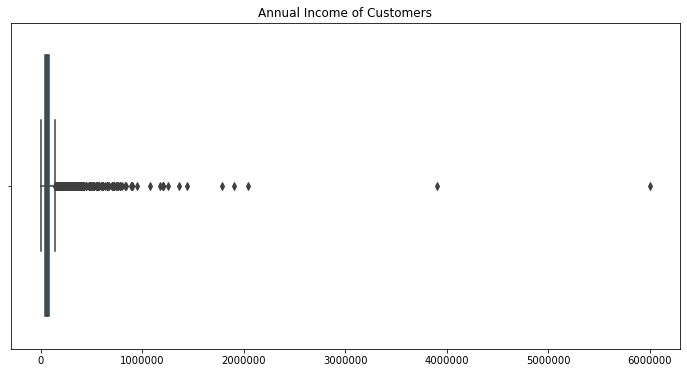

In [18]:
# F. Outlier Detection

fig, ax = plt.subplots(figsize=(12,6))
plt.ticklabel_format(style='plain')
ax = sns.boxplot(data= loan, x="annual_inc")
ax.set(title="Annual Income of Customers", xlabel=None);

In [19]:
# G. Condition for data to be considered as outliers, when it is more than 1.5*IQR

Q3 = loan["annual_inc"].quantile(0.75) 
Q1 = loan["annual_inc"].quantile(0.25)

IQR = Q3-Q1


# Filtering the outiers out

loan_outliers_removed = loan[(loan["annual_inc"]<= 1.5*IQR)]

# Records left after removing outliers
print("Records left after removing outliers: ",len(loan_outliers_removed))

# Percentage of data left after removing outliers
print("\nPercentage of records left: ", str(round((len(loan_outliers_removed)/len(loan))*100))+"%")

Records left after removing outliers:  21936

Percentage of records left:  57%


### Note:
Upon checking the data of every column for outliers, it was noticed that it was not likely due to error in data collection, as the number of outliers is quite high which significantly contributes to the data, so outlier treatment is not needed, as it will remove quite a large percentage of data from the dataset.

In [20]:
loan.nunique().sort_values()

term                           2
loan_status                    2
pub_rec_bankruptcies           3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      40
issue_d                       55
total_acc                     82
int_rate                     370
earliest_cr_line             524
loan_amnt                    870
funded_amnt                 1019
revol_util                  1088
total_rec_late_fee          1320
collection_recovery_fee     2616
dti                         2853
recoveries                  4040
annual_inc                  5215
total_rec_prncp             6841
funded_amnt_inv             8050
installment                15022
revol_bal                  21275
total_rec_int              34025
last_pymnt

## Derived Metrics
Currently the dataset has two datetime columns, we need to extract month and year from these columns to gain more insights

In [21]:
# D. Conversion of "issue_d" and "earliest_cr_line" from object to datatime

loan['issue_d'] =  pd.to_datetime(loan['issue_d'], format='%b-%y')
loan['earliest_cr_line'] =  pd.to_datetime(loan['earliest_cr_line'], format='%b-%y')

In [22]:
# A. Creating "issue_year" and "issue_month" from "issue_d" columnm 

loan["issue_year"] = pd.DatetimeIndex(loan["issue_d"]).year
loan["issue_month"] = pd.DatetimeIndex(loan["issue_d"]).month

# B. Dropping the "issue_d" column
loan.drop(columns=["issue_d"], inplace=True)

In [23]:
# C. Creating "earliest_cr_line_y" and "earliest_cr_line_m" from "earliest_cr_line" columnm 

loan["earliest_cr_line_y"] = pd.DatetimeIndex(loan["earliest_cr_line"]).year
loan["earliest_cr_line_m"] = pd.DatetimeIndex(loan["earliest_cr_line"]).month


# D. Dropping the "earliest_cr_line" column
loan.drop(columns=["earliest_cr_line"], inplace=True)

## <span style='color:indigo'> As data has been cleaned and formatted, so it is ready to be analyzed now

In [24]:
# Segmenting the data into defaulters and fully-paid customers for more insights

df_defaulters = loan[(loan["loan_status"] == "Charged Off")]
df_fullypaid = loan[(loan["loan_status"] == "Fully Paid")]

print("Total number of defaulters: ", len(df_defaulters))
print("\nTotal number of fully-paid customers: ", len(df_fullypaid))
print("\nPercentage of defaulters: ", round(len(df_defaulters)/len(loan)*100))

Total number of defaulters:  5627

Total number of fully-paid customers:  32950

Percentage of defaulters:  15


## Data Analysis

### 1. Analyzing the purpose of loan taken by customers

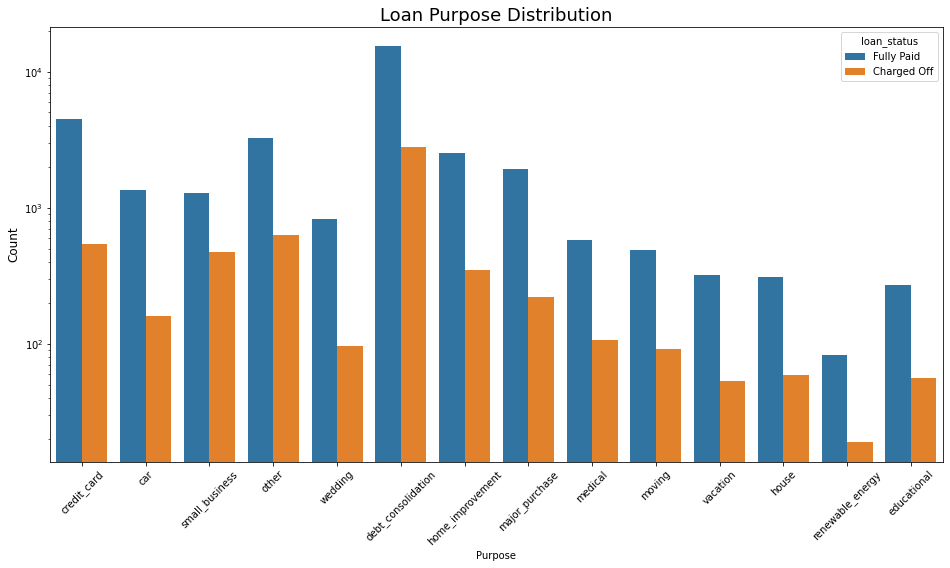

In [25]:
fig, ax = plt.subplots(figsize=(16,8))

# Setting log scale to make plot readable
ax.set(yscale = 'log')

sns.countplot(data=loan, x="purpose", hue="loan_status")
ax.set_title("Loan Purpose Distribution", fontsize=18)
ax.set_xlabel(xlabel="Purpose")
ax.set_ylabel("Count", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

In [26]:
# A comparison of the purpose of loan taken by Defaulters vs Fully-Paid Customers (Percentage)


(round(pd.crosstab(loan["purpose"], loan["loan_status"], normalize='columns') * 100,2))

loan_status,Charged Off,Fully Paid
purpose,,
car,2.84,4.06
credit_card,9.63,13.61
debt_consolidation,49.17,46.40
educational,1.00,0.82
home_improvement,6.17,7.67
house,1.05,0.93
major_purchase,3.95,5.85
medical,1.88,1.75
moving,1.63,1.47


### <span style='color:green'> Observation<br>
Top 3 reasons to borrow loans by customers who have defaulted:<br>
    1 - Debt Consolidation - 49%<br>
    2 - Other - 11%<br>
    3 - Credit Card - 10%


### 2. Analyzing the home ownership of customers

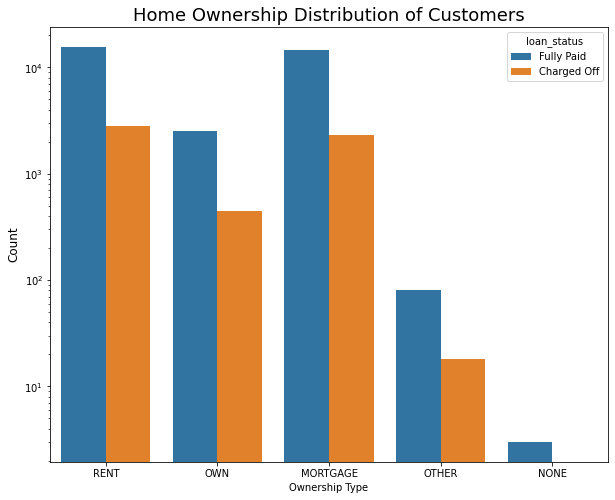

In [27]:
fig, ax = plt.subplots(figsize=(10,8))

# Setting log scale to make plot readable
ax.set(yscale = 'log')

sns.countplot(data=loan, x="home_ownership", hue="loan_status")
ax.set_title("Home Ownership Distribution of Customers", fontsize=18)
ax.set_xlabel(xlabel="Ownership Type")
ax.set_ylabel("Count", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels())

plt.show()

In [28]:
# A comparison of homeownership of Defaulters vs Fully-Paid Customers (Percentage)


(round(pd.crosstab(loan["home_ownership"], loan["loan_status"], normalize='columns') * 100,2)).T

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,
Charged Off,41.35,0.00,0.32,7.87,50.45
Fully Paid,44.59,0.01,0.24,7.68,47.47


### <span style='color:green'> Observation<br>
House ownership of the customers who have defaulted:<br>
    1 - Rent - 50%<br>
    2 - Mortgage - 41%<br>

### 3. Analyzing the employment length of customers

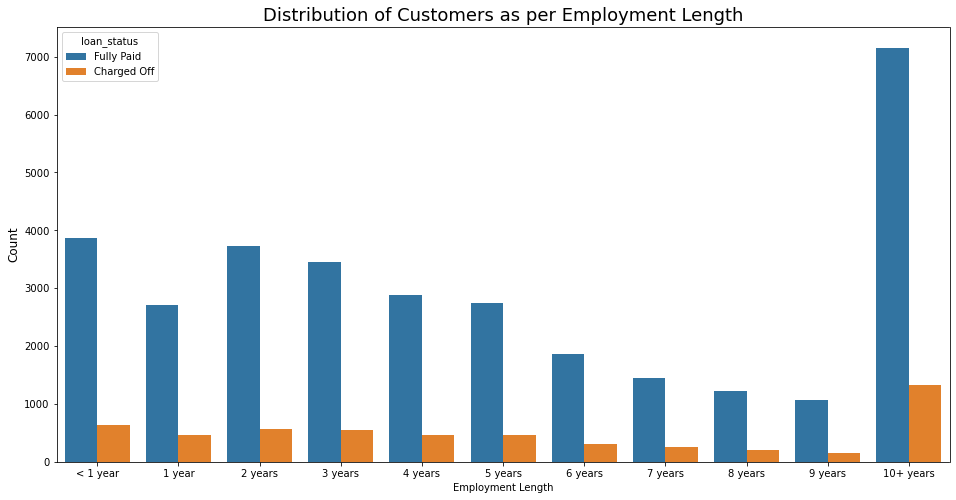

In [29]:
fig, ax = plt.subplots(figsize=(16,8))

sns.countplot(data =loan, x="emp_length", hue ="loan_status", order=['< 1 year', '1 year','2 years','3 years', '4 years','5 years', '6 years','7 years', '8 years','9 years', '10+ years'])

ax.set_title("Distribution of Customers as per Employment Length", fontsize=18)
ax.set_xlabel(xlabel="Employment Length")
ax.set_ylabel("Count", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels())

plt.show()

In [30]:
# A comparison of employment length of Defaulters vs Fully-Paid Customers (Percentage)


(round(pd.crosstab(loan["emp_length"], loan["loan_status"], normalize='columns') * 100,2)).T

emp_length,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
loan_status,,,,,,,,,,,
Charged Off,8.45,24.65,10.50,10.28,8.56,8.48,5.69,4.87,3.76,2.93,11.84
Fully Paid,8.44,22.26,11.59,10.75,8.96,8.51,5.79,4.50,3.83,3.32,12.04


### <span style='color:green'> Observation<br>
Percent-wise top 3 employment duration of the customers who have defaulted:<br>
    1 - More than 10 years of experience - 25%<br>
    2 - Less than 1 year of experience - 12%<br>
    3 - 2 Years and 3 years of experience - 10%

### 4. Analyzing the grades assigned to Customers

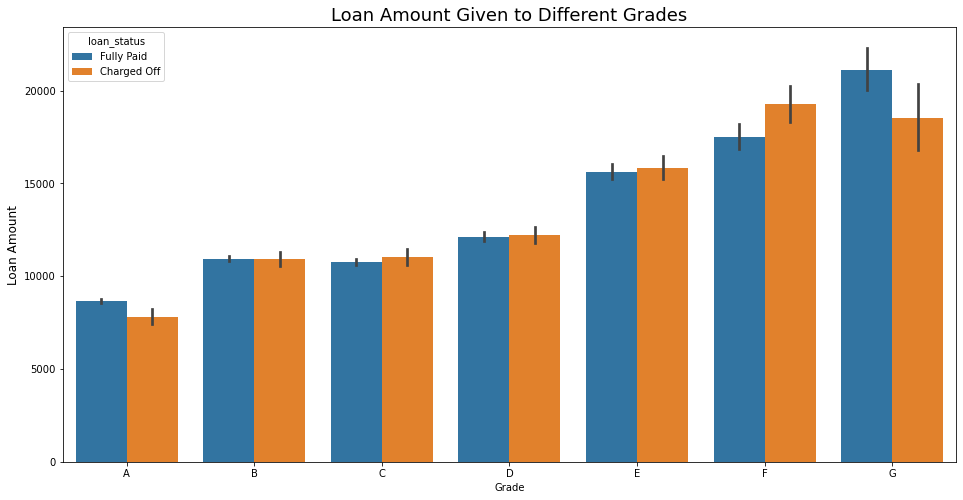

In [31]:
fig, ax = plt.subplots(figsize=(16,8))

sns.barplot(data =loan, x="grade", y="loan_amnt", hue ="loan_status", order=sorted(loan["grade"].unique()))

ax.set_title("Loan Amount Given to Different Grades", fontsize=18)
ax.set_xlabel(xlabel="Grade")
ax.set_ylabel("Loan Amount", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels())

plt.show()

In [32]:
# A comparison of homeownership of Defaulters vs Fully-Paid Customers


round(pd.crosstab(loan["grade"], loan["loan_status"], normalize="columns")*100,2).T

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,10.70,25.32,23.94,19.87,12.71,5.67,1.79
Fully Paid,28.66,31.11,19.69,12.04,5.91,1.99,0.60


### <span style='color:green'> Observation<br>
Percent-wise top 3 grades of the customers who have defaulted:<br>
    1 - Grade B - 25%<br>
    2 - Grade C - 24%<br>
    3 - Grade D - 20%

### 5. Analyzing the amount of loan given to customers

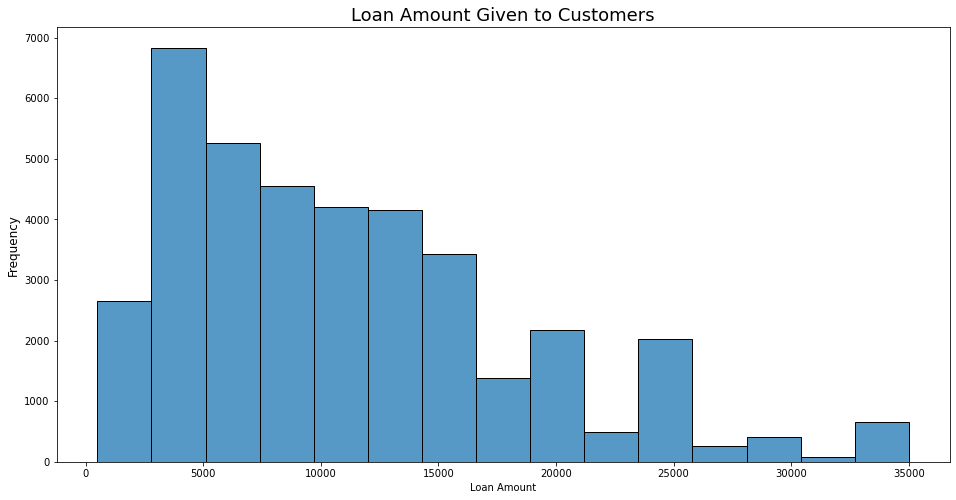

In [33]:
fig, ax = plt.subplots(figsize=(16,8))


sns.histplot(loan["loan_amnt"], bins=15)
ax.set_title("Loan Amount Given to Customers", fontsize=18)
ax.set_xlabel(xlabel="Loan Amount")
ax.set_ylabel("Frequency", fontsize=12)

plt.show()

### 5A. Analyzing the amount of loan given to customers who have defaulted

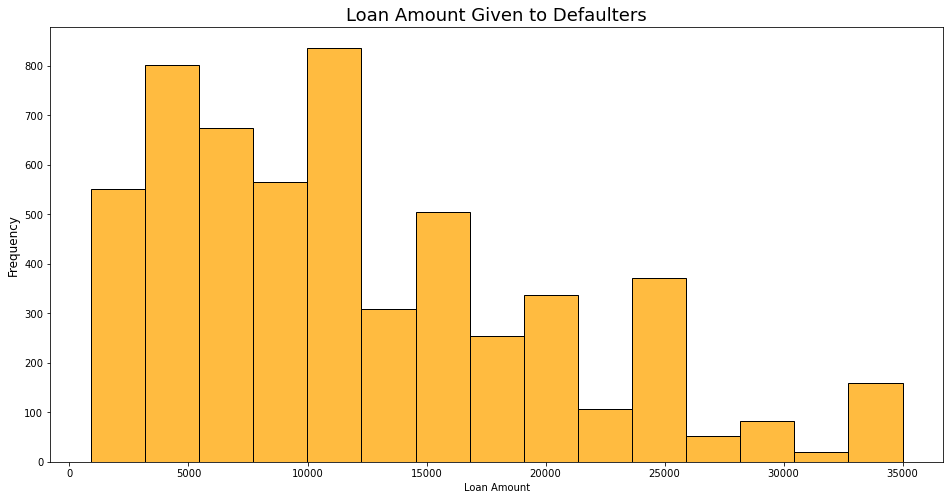

In [34]:
fig, ax = plt.subplots(figsize=(16,8))


sns.histplot(df_defaulters["loan_amnt"], bins=15, color="orange")
ax.set_title("Loan Amount Given to Defaulters", fontsize=18)
ax.set_xlabel(xlabel="Loan Amount")
ax.set_ylabel("Frequency", fontsize=12)

plt.show()

In [35]:
# Amount of loan given:

print("1. Total loan given: ",loan["loan_amnt"].sum())
print("2. Loan given to fully-paid customers: ",df_fullypaid["loan_amnt"].sum())
print("3. Defaulters: ",df_defaulters["loan_amnt"].sum())

1. Total loan given:  426161100
2. Loan given to fully-paid customers:  358049725
3. Defaulters:  68111375


### <span style='color:green'> Observation<br>
Total amount of loan given = 426.1 Million <br>
Total amount of loan given to customers who have defaulted = 68.1 Million <br>
Percentage of loan given to defaulters = 16%


### 6. Analyzing the verification status of customers

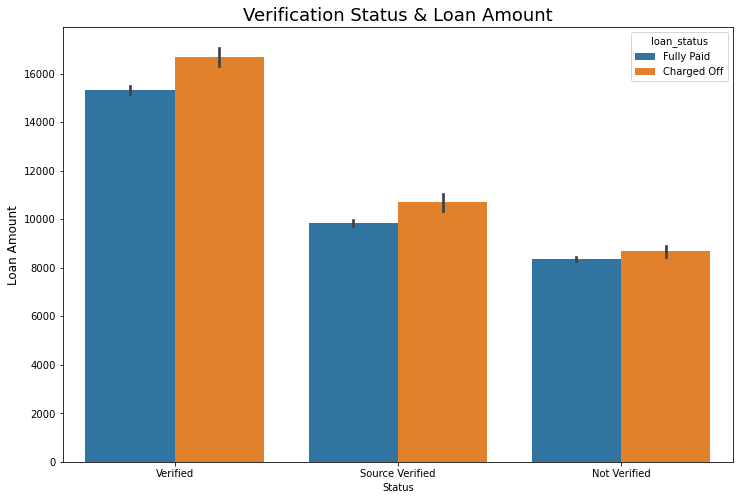

In [36]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(data =loan, x="verification_status", y="loan_amnt", hue ="loan_status")

ax.set_title("Verification Status & Loan Amount", fontsize=18)
ax.set_xlabel(xlabel="Status")
ax.set_ylabel("Loan Amount", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels())

plt.show()

In [37]:
# Stats of defaulters as per verification status


total_defaulters = len(df_defaulters)
total_unverified_defaulters = len(df_defaulters[(df_defaulters["verification_status"] == "Not Verified")])

print("Total number of defaulters  : ", total_defaulters)
print("\nTotal unverified defaulters : ", total_unverified_defaulters)
print("\nPercentage of unverified defaulters : ", round(total_unverified_defaulters/total_defaulters*100))

Total number of defaulters  :  5627

Total unverified defaulters :  2142

Percentage of unverified defaulters :  38


### <span style='color:green'> Observation<br>
The percentage of unverified defaulters is 38%, which is quite high.

### 7. Analyzing the Interest Rate Charged to Different Grade Customers

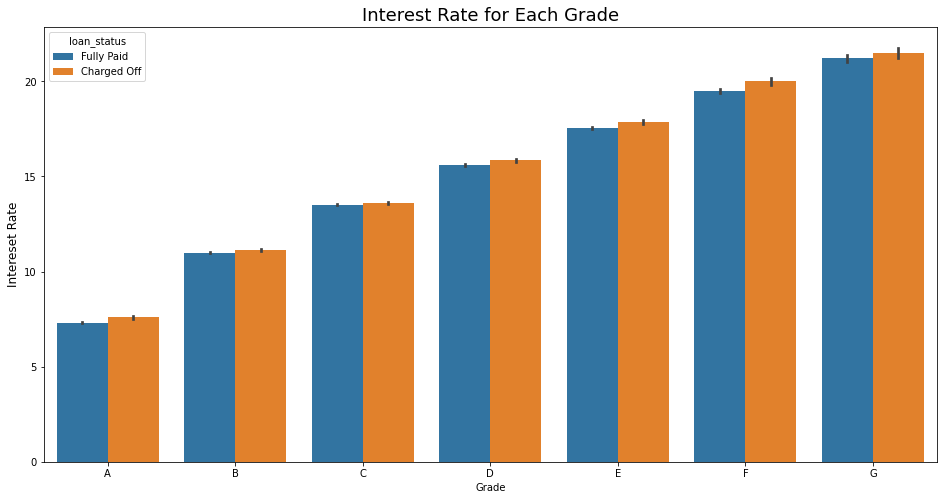

In [38]:
fig, ax = plt.subplots(figsize=(16,8))

sns.barplot(data=loan, x="grade", y="int_rate", hue ="loan_status", order=sorted(loan["grade"].unique()))

ax.set_title("Interest Rate for Each Grade", fontsize=18)
ax.set_xlabel(xlabel="Grade")
ax.set_ylabel("Intereset Rate", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels())

plt.show()

### 8. Analyzing the defaulters who have borrowed loan for debt consolidation

In [39]:
# Creating dataframe for defaulters who have borrowed loan for debt consolidation
loan_for_debt = df_defaulters[(df_defaulters["purpose"] == "debt_consolidation")]

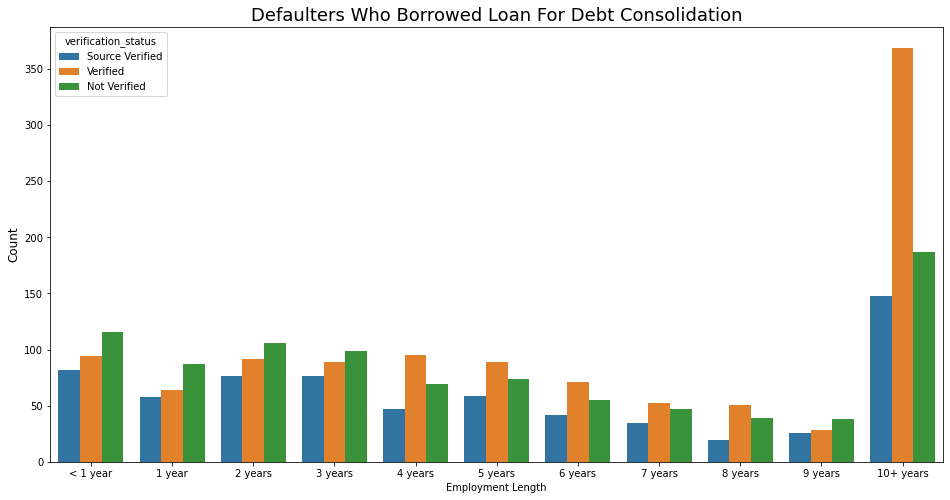

In [40]:
fig, ax = plt.subplots(figsize=(16,8))

sns.countplot(data =loan_for_debt, x="emp_length", hue="verification_status", order=['< 1 year', '1 year','2 years','3 years', '4 years','5 years', '6 years','7 years', '8 years','9 years', '10+ years'])

ax.set_title("Defaulters Who Borrowed Loan For Debt Consolidation", fontsize=18)
ax.set_xlabel(xlabel="Employment Length")
ax.set_ylabel("Count", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels())

plt.show()

### Note:
Since, the defaulters who have taken loan for debt consolidation is significantly higher, we need to further investigate for such defaulters.

### 9. Analyzing the verification status of defaulters who have borrowed loan for debt consolidation and have more than 10 years of experience

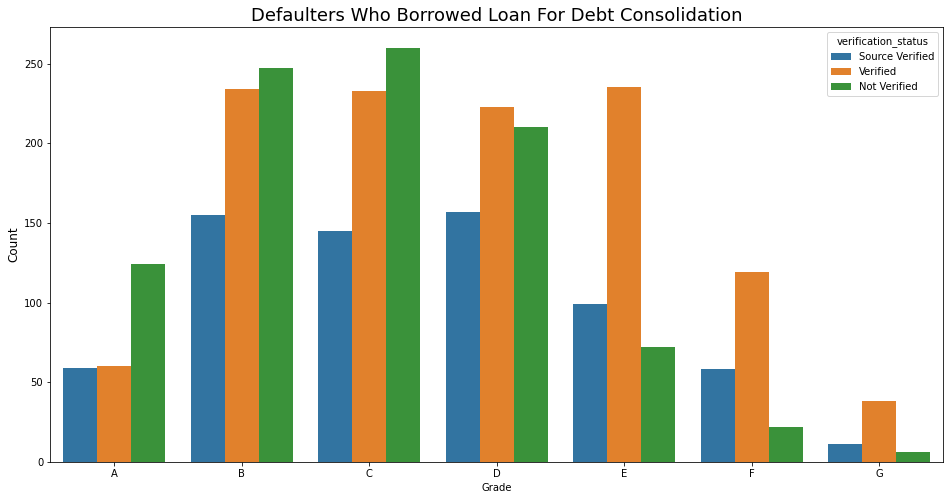

In [41]:
# Analyzing the loan taken by defaulters for debt consolidation who have more than 10 years of experience

loan_for_debt_10years = loan_for_debt[(loan_for_debt["emp_length"] == "10+ years")]


fig, ax = plt.subplots(figsize=(16,8))

sns.countplot(data =loan_for_debt, x="grade", hue="verification_status", order=sorted(loan["grade"].unique()))

ax.set_title("Defaulters Who Borrowed Loan For Debt Consolidation", fontsize=18)
ax.set_xlabel(xlabel="Grade")
ax.set_ylabel("Count", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels())

plt.show()

### <span style='color:blue'> Summary<br>
*Lending Club should consider following points and exercise caution while approving loans:*

1. Out of all the defaulters, the percentage of those who borrowed loan for debt consolidation is **49%**, which is at least **4 times more** than that of any other purposes <br>
2. Among all the defaulters, those who have **0 to 3 years** of experience and **more than 10 years** of experience combinedly contribute to become **47%** of the defaulters. <br>
3. As the grades move from A to G, the amount of loan gradually increases; and the defaulters falling under grade B, C, and D combinedly become **69%** of the defaulters.<br>
4. Even the verified customers who were given the loan amount exceeding **15,000** have defaulted. Such verified defaulters are in excess of **60%** of all the defaulters.<br>
5. Number of verified defaulters, who have more than 10 years of experience and who have taken loan for debt consolidation, is at least **three times more** than any other employment length.<br>